# Inaugural Project

**Table of contents**<a id='toc0_'></a>    
-  [Imports](#toc1_)      
- 1.a. [Basic Edgeworth box](#toc2_1_)   
- 2.a  [Error in the market clearing](#toc2_a) 
- 3.a  [Market clearing price](#toc3_a) 
- 4.a  [Allocation if only p_1 can be chosen](#toc4_a) 
- 4.b  [Allocation if any positive price can be chosen](#toc4_b) 
  
- 5.a  [Allocation if the choice set is restricted to C](#toc5_a) 
- 5.b  [allocation if no further restrictions are imposed ](#toc5_b) 
 
- 6.a  [Find the resulting allocation](#toc6_a) 

- 6.b  [Illustrate and compare with your results in questions 3)-5)](#toc6_b) 

- 7.a  [a set W with 50 elements](#toc7_a) 
- 8.a  [The market equilibrium allocation for each ωA ∈ W](#toc8_a) 
- [Conclusion](#toc9_)

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

##  <a id='toc1_'></a>[Imports](#toc0_)

In [916]:
import numpy as np
import pandas as pd
import scipy 
from types import SimpleNamespace
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy 
from types import SimpleNamespace
from scipy.optimize import root
from scipy import optimize


# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})



# Import your own code
from inauguralproject import ExchangeEconomyClass 


model=ExchangeEconomyClass()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload




 ## <a id='toc2_'></a>[Questions](#toc0_)

### 1.a. <a id='toc2_1_'></a>[Basic Edgeworth box](#toc0_)

I import the Exchange Economy model

In [917]:
model=ExchangeEconomyClass()

I create a list of all 75 possible $\frac{1}{N}$. I then define all the goods.

In [918]:
lst = [0]

for i in range(1, 75):
    lst.append(i/75)
x1A=lst.copy()
x2A=lst.copy()
x1B=[1-val for val in x1A]
x2B=[1-val for val in x1B]



A quick test to see if i can call on the model correctly

In [919]:
print(model.demand_A(1))
print(model.demand_B(1))
nooo = model.check_market_clearing(0.8)
print(nooo)

print(model.utility_A(1,2))


(0.3666666666666667, 0.7333333333333335)
(0.5999999999999999, 0.3)
(0.10833333333333311, -0.08666666666666645)
1.5874010519681996


I define the list of Pareto improvements with a for loop. I then plot all the pareto improvements in the Edgeworth Box.



In [920]:
x=[]
y = []
for i in x1A:
    for j in x2A:
        
        if model.utility_A(i,j) >= model.utility_A(model.par.w1A,model.par.w2A) and model.utility_B(1-i,1-j) >= model.utility_B(model.par.w1B,model.par.w2B):
            x.append(i)
            y.append(j)

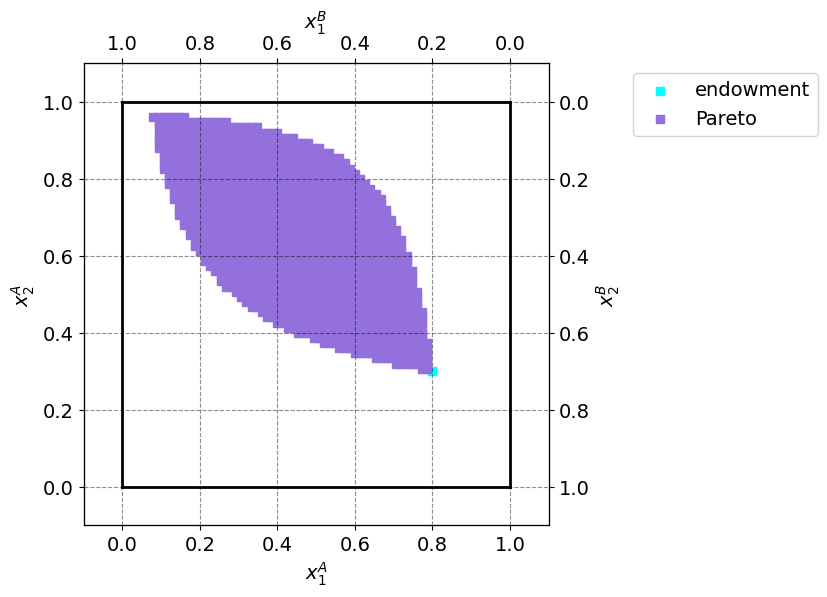

In [921]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='aqua',label='endowment')
ax_A.scatter(x,y,marker='s',color='mediumpurple',label='Pareto')


# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

 ### 2.a. <a id='toc2_a'></a>[Error in the market clearing](#toc0_)

First i define the list of possible prices: 

In [962]:

p1_2=[0.5]
for n in range(1, 76):
    p1_2.append(0.5+2*n/75)



I initialize an empty list, that eventually will hold the error values. I make the error list by looping every element from the price list in the check_market_clearing model that return the errors. I then split the tuple up into two lists. Lastly i plot the market clearing errors.

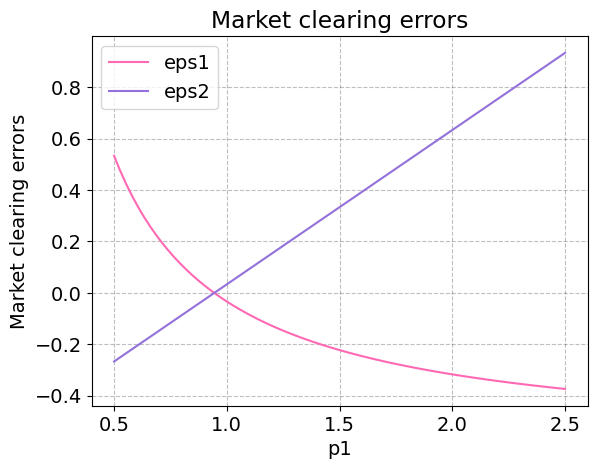

In [923]:
errors=[]
for e in p1_2:
    error_values=model.check_market_clearing(e)
    errors.append(error_values)

errors
#i split my tuple up into two lists
eps1_errors = []
eps2_errors = []
for e in p1_2:
    error_values = model.check_market_clearing(e)
    eps1_errors.append(error_values[0])
    eps2_errors.append(error_values[1])



plt.plot(p1_2,eps1_errors, label='eps1', color='hotpink')
plt.plot(p1_2,eps2_errors, label='eps2', color='mediumpurple')
plt.legend(loc='upper left')
plt.xlabel('p1')
plt.ylabel('Market clearing errors')
plt.title('Market clearing errors')
plt.show()

 ### 3.a. <a id='toc3_a'></a>[Market clearing price](#toc0_)

I initialize an empty list. To check if the market clears i call on the model:check_market_clearing. I add a threshold for the errors, to make sure i get the smallest errors for market clearing and add the values to the initialized list

In [924]:
market_clearing_price=[]
for e in p1_2:
    eps1_errors,eps2_errors=model.check_market_clearing(e)
    if eps1_errors<0.01 and eps2_errors<0.01:
        market_clearing_price.append(e)

    
print(f"The market clearing price is {market_clearing_price}")


#code for comparison in Q6b#
x1_3=model.demand_A(0.9533333333333334)[0]
x2_3=model.demand_A(0.9533333333333334)[1]


The market clearing price is [0.9533333333333334]


 ### 4.a. <a id='toc4_a'></a>[Allocation if only p_1 can be chosen](#toc0_)

I have made a model in the py, where i have defined the set of prices, as well as computed the demands, utility and maximum utility. In the following code i just call on the model to show the optimal allocation.

In [961]:
best_allocation_0, best_price_0 = model.find_best_allocation_0()

print("The optimal allocation is (x1A, x2A, x1B, x2B)=",tuple(f"{i:.4f}" for i in best_allocation_0))

print(f" The optimal price is {best_price_0:.4f}")

#The following is code for comparison in Q6b:#
x1_4a=best_allocation_0[0]
x2_4a=best_allocation_0[1]


The optimal allocation is (x1A, x2A, x1B, x2B)= ('0.6193', '0.6409', '0.3807', '0.3591')
 The optimal price is 1.8867


 ### 4.b. <a id='toc4_b'></a>[Allocation if any positive price can be chosen](#toc0_)

Any positive price can be chosen, so i define the price, so it can only take positive values with 'type': 'ineq'. 'fun': p1_positive  -  applies it. The bounds are as given in the project description. I give a start value and use a solver to optimize A's utility.

In [926]:
def p1_positive(p):
    return p  
constraints ={'type': 'ineq', 'fun': p1_positive} 
bounds = [(0,None)] 
initial_guess = 1
sol_case2 = optimize.minimize(
model.utility_A_negative, initial_guess, bounds = bounds,
method='SLSQP',constraints= constraints)



best_price_4b = sol_case2.x
x1_4b = 1-model.demand_B(best_price_4b)[0]
x2_4b = 1-model.demand_B(best_price_4b)[1]

print(f"The optimal price is {best_price_4b[0]:.4f}")
#print("The optimal allocation is x1A=", 1-model.demand_B(best_price_4b)[0], "and x2A=",1-model.demand_B(best_price_4b)[1])
print(f"The optimal allocation is x1A= {1-model.demand_B(best_price_4b)[0].item():.4f} and x2A= {1-model.demand_B(best_price_4b)[1].item():.4f}")



The optimal price is 1.8968
The optimal allocation is x1A= 0.6206 and x2A= 0.6402


 ### 5.a. <a id='toc5_a'></a>[Allocation if the choice set is restricted to C](#toc0_)


We know that A is the market maker, and that the choice set is restricted to C. I set up new utility funtions for A and B based on their initial endowment. I then make a list, pareto_5a, which gives the same list as in Q1, i.e the Pareto improvements relative to the endowment. I make allocation variables, and give them a start value. I run a for loop which gives the optimal allocations.


In [927]:
utility_A_5a= model.utility_A(par.w1A, par.w2A)
utility_B_5a=model.utility_B(1-par.w1A, 1-par.w2A)


def demand_B_pareto(x1A, x2A):
        x1B, x2B = 1 - x1A, 1-x2A
        return model.utility_A(x1A,x2A)>= utility_A_5a and model.utility_B(x1B,x2B)>= utility_B_5a


N=75
pareto_5a=[]
for x1A in np.linspace(0,1,N+1):
    for x2A in np.linspace(0,1,N+1):
        if demand_B_pareto(x1A, x2A):
            pareto_5a.append((x1A,x2A))

utility_5a=0
x1_5a=0
x2_5a=0
for l in pareto_5a:
    if model.utility_A(l[0],l[1])>utility_5a:
        utility_5a=model.utility_A(x1_5a,x2_5a)
        x1_5a=l[0]
        x2_5a=l[1]


print(f"The optimal allocation is x1A= {x1_5a.item():.4f} and x2A= {x2_5a.item():.4f}")

The optimal allocation is x1A= 0.5733 and x2A= 0.8400


  ### 5.b. <a id='toc5_b'></a>[allocation if no further restrictions are imposed](#toc0_)

B's utility should be equal or greater to the utility with endowments, i define the constraints as such. The bounds are as defines in the project description. I then call a solver and use SLSQP to get the optimal allocation.

In [928]:
constraints = ({'type': 'ineq', 'fun': lambda x: model.utility_B(1 - x[0], 1 - x[1]) - model.utility_B(1-model.par.w1A, 1-model.par.w2A)})
bounds = ((0, 1), (0, 1)) 


initial_guess = [model.par.w1A, model.par.w2A]
sol_case2 = optimize.minimize(
    model.utility_A_negative_2, initial_guess,
    method='SLSQP', bounds=bounds, constraints=constraints)

#For comparison in Q6b#
x1_5b = sol_case2.x[0]
x2_5b = sol_case2.x[1]

print(f"The optimal allocation is x1A= {sol_case2.x[0].item():.4f} and x2A= {sol_case2.x[1].item():.4f}")

The optimal allocation is x1A= 0.5757 and x2A= 0.8444


### 6.a. <a id='toc6_a'></a>[Find the resulting allocation](#toc0_)


We now assume that A's and B's consumption are chosen by the utilitarian social planner to maximize aggregate utility. I have defined the aggregate utility for A and B and the bounds is the ones given in the project description. I then use a solver to optimize the aggregate utility.

In [929]:
bounds = ((0, 1), (0, 1)) 

initial_guess = [0.8, 0.2]
sol_case6 = optimize.minimize(
    model.aggregate_utility, initial_guess,
    method='SLSQP', bounds=bounds,)
#For comparison in Q6b#
x1_6a = sol_case6.x[0]
x2_6b = sol_case6.x[1]

print(f"The optimal allocation is x1A= {sol_case6.x[0].item():.4f} and x2A= {sol_case6.x[1].item():.4f}")

The optimal allocation is x1A= 0.3330 and x2A= 0.6670


### 6.b. <a id='toc6_b'></a>[Illustrate and compare with your results in questions 3)-5)](#toc0_)

I simply plot all the previous results into the edgeworth box from Q1 to compare the results 

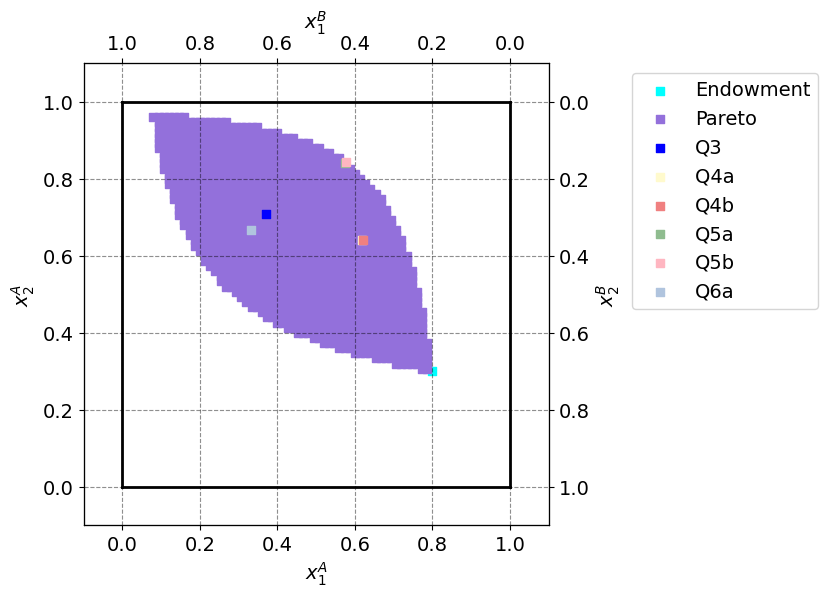

In [930]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='aqua',label='Endowment')
ax_A.scatter(x,y,marker='s',color='mediumpurple',label='Pareto')
ax_A.scatter(x1_3,x2_3,marker='s',color='blue',label='Q3')
ax_A.scatter(x1_4a,x2_4a,marker='s',color='lemonchiffon',label='Q4a  ')
ax_A.scatter(x1_4b,x2_4b,marker='s',color='lightcoral',label='Q4b')
ax_A.scatter(x1_5a,x2_5a,marker='s',color='darkseagreen',label='Q5a')
ax_A.scatter(x1_5b,x2_5b,marker='s',color='lightpink',label='Q5b')
ax_A.scatter(x1_6a,x2_6b,marker='s',color='lightsteelblue',label='Q6a')



# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

Pros and cons of the various allocations: 
All of the various allocations is within the pareto allocations - This means that no matter what allocation is "chosen", both player A and B is at least as well off as they were, when consuming their endowments.

### 7.a. <a id='toc7_a'></a>[a set W with 50 elements](#toc0_)

I make sure to use seed so the list is preserved. I generate 50 random pairs for ω1A and ω2A drawing from a uniform distribution between 0 and 1. I combine ω1A and ω2A and then i print the set

In [931]:
np.random.seed(0) 

ω1A = np.random.uniform(0, 1, 50)
ω2A = np.random.uniform(0, 1, 50)

W = np.column_stack((ω1A, ω2A))

for i, element in enumerate(W, start=1):
    print(f"Element{i}: {tuple(element)}")

Element1: (0.5488135039273248, 0.5701967704178796)
Element2: (0.7151893663724195, 0.43860151346232035)
Element3: (0.6027633760716439, 0.9883738380592262)
Element4: (0.5448831829968969, 0.10204481074802807)
Element5: (0.4236547993389047, 0.2088767560948347)
Element6: (0.6458941130666561, 0.16130951788499626)
Element7: (0.4375872112626925, 0.6531083254653984)
Element8: (0.8917730007820798, 0.2532916025397821)
Element9: (0.9636627605010293, 0.4663107728563063)
Element10: (0.3834415188257777, 0.24442559200160274)
Element11: (0.7917250380826646, 0.15896958364551972)
Element12: (0.5288949197529045, 0.11037514116430513)
Element13: (0.5680445610939323, 0.6563295894652734)
Element14: (0.925596638292661, 0.1381829513486138)
Element15: (0.07103605819788694, 0.1965823616800535)
Element16: (0.08712929970154071, 0.3687251706609641)
Element17: (0.02021839744032572, 0.8209932298479351)
Element18: (0.832619845547938, 0.09710127579306127)
Element19: (0.7781567509498505, 0.8379449074988039)
Element20: (0

### 8.a. <a id='toc8_a'></a>[The market equilibrium allocation for each ωA ∈ W](#toc0_)

I inititialize an empty list to store the market allocations in. I then use a for loop, where i define the new endowments. I then store the 50 allocations.

In [938]:
market_equilibrium_allocations=[]

for w in W:
    model.par.w1A, model.par.w2A=w
    market_clearing_price_8a=model.market_clearing_price_8()
    x1A_8a,x2A_8a= model.demand_A(market_clearing_price_8a)
    x1B_8a,x2B_8a= model.demand_B(market_clearing_price_8a)
    market_equilibrium_allocations.append((x1A_8a,x2A_8a, x1B_8a,x2B_8a))

I unpack the values for each good and i then plot the market equilibrirum allocations for A and B seperately.  


In [957]:
x1A_values_8a = [x[0] for x in market_equilibrium_allocations]
x2A_values_8a = [x[1] for x in market_equilibrium_allocations]
x1B_values_8a = [x[2] for x in market_equilibrium_allocations]
x2B_values_8a = [x[3] for x in market_equilibrium_allocations]

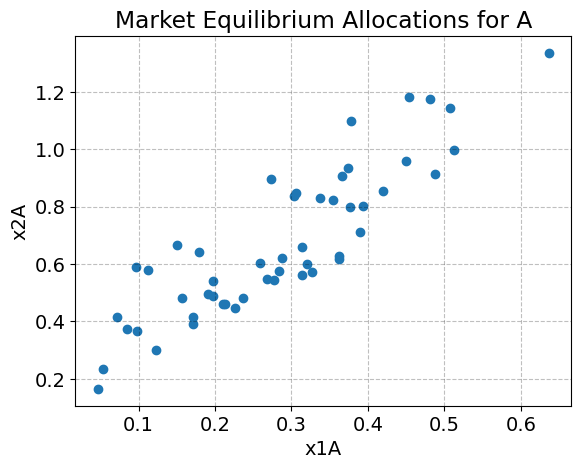

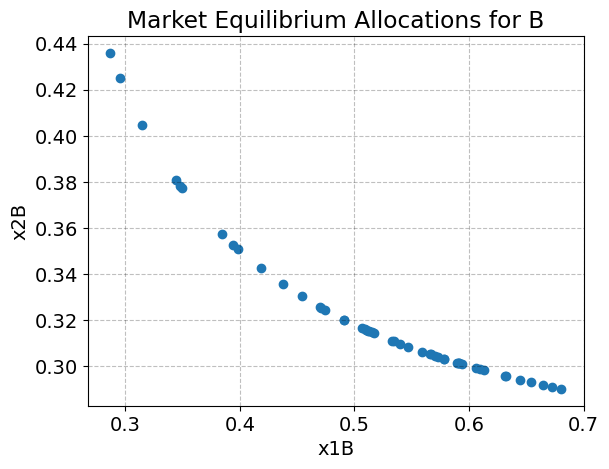

In [960]:
plt.scatter(x1A_values_8a, x2A_values_8a)
plt.xlabel('x1A')
plt.ylabel('x2A')
plt.title('Market Equilibrium Allocations for A')
plt.show()

plt.scatter(x1B_values_8a, x2B_values_8a)
plt.xlabel('x1B')
plt.ylabel('x2B')
plt.title('Market Equilibrium Allocations for B')
plt.show()

###  <a id='toc9_'></a>[Conclusion](#toc0_)
